<a href="https://colab.research.google.com/github/HamidBekamiri/Econometrics-II/blob/main/05_M3_1_RNN_Tutorial_v2_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The objective of this tutorial

Our goal in this tutorial is to provide simple examples of the RNN model so that you can better understand its functionality and how it can be used in a domain.

After completing this tutorial, you will know:


```
1. What is a recurrent neural network (RNN)?
2. How do RNNs work and what is their structure?
3. How can RNNs be used for tasks such as time series analysis?
4. How to implement an RNN in code using PyTorch?
5. How to train an RNN for a specific task?
6. What are some common challenges and pitfalls to avoid when working with RNNs?
```


## A quick recap on Simple Neural Network (FeedForward)

A simple neural network consists of three different parts namely Parameters, Linear, and None-Linear (Activation Function ) parts:

1. First, a weight is being applied to each input to an artificial neuron.
2. Second, the inputs are multiplied by their weights, and then a bias is applied to the outcome. This is called the weighted sum.
3. Third, the weighted sum is processed via an activation function, as a non-linear function.

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/13UpdymQx-C1tBKRnfD7eOg.gif" width="500">

The neural network can compare the outputs of its nodes with the desired values using a property known as the delta rule, allowing the network to alter its weights through training to create more accurate output values. This training and learning procedure results in gradient descent.

The technique of updating weights in multi-layered perceptrons is virtually the same, however, the process is referred to as back-propagation. In such circumstances, the output values provided by the final layer are used to alter each hidden layer inside the network.

### Problems with a Simple Neural Network

The main shortcomings of traditional neural networks are:

1. They can not handle sequential data
2. They can not remember the sequence of the data, i.e order is not important
3. Can not share parameters across the sequence
4. They have a fixed input length

Let’s have a brief look at these problems, then dig deeper into RNN.

#### 1. They can not handle sequential data

Sequential data in RNN (Recurrent Neural Network) refers to any type of data where the observations have a temporal or sequential relationship. This could include time series data, where each observation is dependent on the previous one, or sequence data, where the order of the observations is important. In RNNs, this type of data is processed through the recurrent connections in the network, allowing the model to maintain and update an internal state based on the information in the sequence. This makes RNNs particularly well suited for tasks such as language modeling, speech recognition, and time series forecasting. There are some variations to the neural network’s configuration based on the shape of the input or output which you can see in the following:

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/SeqData_RNN.png" width="400">



#### 2. They can not remember the sequence of the data, i.e order is not important

The second limitation of traditional neural networks is that they can not remember the sequence of the data, or the order is not important to them. Let’s understand this problem with an example which is shown in this figure (MIT 6.S191 Intro to Deep Learning).

![image.jpeg](https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/Problems-with-Traditional-Neural-Network-2.jpeg)



> *RNNs use feedback connections that allow information to be passed from one step of the sequence to the next, allowing the network to maintain and update an internal state that depends on the past input. This enables RNNs to capture and understand the dependencies and patterns in the sequence data, making them well suited for tasks such as natural language processing and time series analysis.*



#### 3. FeedForward Neural Network Can not share parameters across the sequence

In traditional Feedforward Neural Networks (MLPs), each input is processed independently and there is no mechanism for sharing parameters across different inputs in a sequence. For example, let’s take the sentence **“what is your name? My name is Lasse”**. In an MLP, each word would be treated as a separate input and would be processed through separate hidden layers. There is no way for the network to share information across words in the sequence, such as information about the relationship between words or about common features that occur across different parts of the sequence. In this case, "name"'s parameters should have been shared and so the neural network should have been able to determine that "name"'s words are dependent in this sentence.



> *In contrast, Recurrent Neural Networks (RNNs) have a hidden state that is updated at each time step, allowing the network to maintain information about the sequence and share parameters across different time steps. This makes RNNs well-suited for processing sequential data and for tasks such as sequence classification, language modeling, and machine translation*




Therefore Recurrent Neural Networks (RNN), originally were designed to handle some of the shortcomings that traditional neural networks have when dealing with sequential data.

## What is a Recurrent Neural Network?

Here we can see that the Simple Neural Network is unidirectional, which means it has a single direction, whereas the RNN, has loops inside it to persist the information over timestamp t. This looping preserves the information over the sequence.

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/FNN-RNN.png" width="500">

#### Structure of RNN

Now, let’s dig deeper to understand what is happening under the hood. An RNN consists of four different parts:
1. Linear part (Parameters: This includes the weights and biases of the input-to-hidden layer, the hidden-to-hidden layer, and the hidden-to-output layer.)
> *The hidden state is used to capture the information from the previous time steps, but this information is not relevant after the training process is finished. Therefore, resetting the hidden state parameters to zero ensures that the network starts with a clean slate for making predictions on new, unseen data.*

2. The hidden state (also known as the context state)
> *you can think of the hidden state as representing the "memory" of the network, which is updated at each time step and used to produce the output.*


3. Non-Linear part (Activation Function (Tanh))
> As you can see in the equation above, you feed in both input vector Xt and the previous state ht-1 into the function. Here you’ll have 2 separate weight matrices then apply the Non-linearity (tanh) to the sum of input Xt and previous state ht-1 after multiplication to these 2 weight matrices.
<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/sequence-2.png" width="300">


4. Fully connected (Output layer): Finally, you’ll have the output vector ŷt at the timestamp t.
> <img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/sequence-3.png" width="150">






![](https://raw.githubusercontent.com/HamidBekamiri/Econometrics-II/refs/heads/main/images/RNN_Formula.png)

### RNN code implementation

In Recurrent Neural Networks (RNNs), the terms "input size", "hidden size", and "number of outputs" refer to the following:
> Input size: Refers to the number of features in a single input sample. For example, if the input is a one-hot encoded word, the input size would be the number of unique words in the vocabulary.

> Hidden size: Refers to the number of neurons in the hidden layer. The hidden state of the RNN at each time step is represented by this layer, which helps to capture information from the past time steps.

> Number of outputs: Refers to the number of outputs generated by the RNN. This could be one output for a simple prediction problem, or multiple outputs for a multi-task prediction problem.

Note that these hyperparameters need to be set prior to training the RNN and their choice can affect the model's performance.

The "input to hidden" weights are the connections or weights between the input layer and the hidden layer, and these connections allow the network to learn how to propagate information from the input to the hidden state.

The "hidden to output" weights are the connections or weights between the hidden layer and the output layer, and these connections allow the network to learn how to produce the final output based on the hidden state.

The forward pass is the process of computing the output for a given input sequence. The forward pass starts by initializing the hidden state of the RNN with a zero vector or some other randomly generated values.

In the forward pass we understood how the inputs and the hidden states interact with the weights and biases of the recurrent layers and how to use the information contained in the last hidden state to predict the next time step value.


RNNs use feedback connections that allow information to be passed from one step of the sequence to the next, allowing the network to maintain and update an internal state that depends on the past input. This enables RNNs to capture and understand the dependencies and patterns in the sequence data, making them well suited for tasks such as natural language processing and time series analysis.

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/rnn_timestamps.gif" width="700">

The backward pass is just the application of the chain rule from the loss gradient with respect to the predictions until it becomes with respect to the parameters we want to optimize.

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/understanding-gradient-descent.png" width="400">

The hidden state is used to capture the information from the previous time steps, but this information is not relevant after the training process is finished. Therefore, resetting the hidden state to zero ensures that the network starts with a clean slate for making predictions on new, unseen data.


<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/rnn-shorttermmemory.gif" width="400">

### Which parameters have been trained and should be saved?

The "input to hidden" as Wi2h and the "hidden to hidden" as Wh2h weights are learned during the training process through backpropagation and gradient descent optimization algorithms, and they determine the strength of the relationships between the input, hidden, and output layers.

## How does Keras (TensorFlow) help to implement an RNN?


Let's implement this code using Keras!

In [ ]:
# Installing needed packages for the project

install.packages(c(
  "keras3", "tensorflow", "fredr", "gridExtra", "rsample", "dplyr"
))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘RcppTOML’, ‘here’, ‘png’, ‘future’, ‘globals’, ‘warp’, ‘reticulate’, ‘tfruns’, ‘zeallot’, ‘config’, ‘tfautograph’, ‘furrr’, ‘slider’




In [ ]:
library(rsample) # Load rsample library
library(scales)  # For rescaling functions
library(keras3)
library(tensorflow)
library(ggplot2)
library(dplyr)


Attaching package: ‘tensorflow’


The following objects are masked from ‘package:keras3’:

    set_random_seed, shape



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### Data Preparation

To understand how should we prepare the data for RNN, we’ll use a simple dataset as a Timeseries Forecasting example. Below is the full sequence of values and their restructuring as a training and testing dataset.

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/SequenceDataPerparation.webp" width="400">

Now, let’s separate the datasets into batches!

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/Seq_DataPerparation_2.webp" width="100">

In [ ]:
sequential_data <- c(10, 20, 30, 40, 50, 60, 70, 80, 90)
sequential_data

[1] 10 20 30 40 50 60 70 80 90

In [ ]:
# Convert sequential_data to a data frame
df <- data.frame(sequential_data)

In [ ]:
normalize = function(x) {
  return ((x - min(x, na.rm = TRUE)) / (max(x, na.rm = TRUE) - min(x, na.rm = TRUE)))
}

# Rescale numeric columns
df_scaled = as.data.frame(lapply(df, normalize))
df_scaled

sequential_data
<dbl>
0.000
0.125
0.250
0.375
0.500
0.625
0.750
0.875
1.000


In [ ]:
# Ensure the input is a matrix
df_matrix <- as.matrix(df_scaled)
df_matrix

sequential_data
0.000
0.125
0.250
0.375
0.500
0.625
0.750
0.875
1.000



<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/SequenceDataPerparation.webp" width="400">

In [ ]:
n_timesteps <- 3

# Get dimensions of the matrix
n_samples <- nrow(df_matrix) - n_timesteps
n_features <- ncol(df_matrix)

n_samples
n_features

[1] 6

[1] 1



Now, let’s separate the datasets into batches!

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/Seq_DataPerparation_2.webp" width="100">

In [ ]:
# Create empty lists to store X and y
X_list <- list()
y_list <- list()

# Fill the lists with sequences and target values
for (i in 1:n_samples) {
  X_list[[i]] <- df_matrix[i:(i + n_timesteps - 1), ]  # Sequence of n_timesteps
  y_list[[i]] <- df_matrix[i + n_timesteps, ]         # Next value as target
}

# Convert lists to arrays
X <- array(do.call(rbind, X_list), dim = c(n_samples, n_timesteps, n_features))
y <- matrix(unlist(y_list), nrow = n_samples, byrow = TRUE)
X
y

, , 1

      [,1]  [,2]  [,3]
[1,] 0.000 0.125 0.250
[2,] 0.125 0.250 0.375
[3,] 0.250 0.375 0.500
[4,] 0.375 0.500 0.625
[5,] 0.500 0.625 0.750
[6,] 0.625 0.750 0.875

0.375
0.500
0.625
0.750
0.875
1.000



*   **X** is an array because it represents a 3D structure **(batch × timesteps × features)**, which is the required input format for LSTM models.

*   **y** is a matrix because it represents a 2D structure **(batch × target values)**, where each row corresponds to one target sequence for each sample.

Implementing code for LSTM and RNN requires sequential data preparation. The data preparation process for these models is visualized here!


<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/sequence.gif" width="600">


In [ ]:
univar_rnn_input <- function(df, n_timesteps) {
  # Ensure the input is a matrix
  df_matrix <- as.matrix(df)
  head(df_matrix)
  # Get dimensions of the matrix
  n_samples <- nrow(df_matrix) - n_timesteps
  n_features <- ncol(df_matrix)

  # Create empty lists to store X and y
  X_list <- list()
  y_list <- list()

  # Fill the lists with sequences and target values
  for (i in 1:n_samples) {
    X_list[[i]] <- df_matrix[i:(i + n_timesteps - 1), ]  # Sequence of n_timesteps
    y_list[[i]] <- df_matrix[i + n_timesteps, ]         # Next value as target
  }

  # Convert lists to arrays
  X <- array(do.call(rbind, X_list), dim = c(n_samples, n_timesteps, n_features))
  y <- matrix(unlist(y_list), nrow = n_samples, byrow = TRUE)

  return(list(X = X, y = y))
}

We need to prepare the dataset as sequential data in the required format for RNNs so that it can be used in the model we will create."

<img src="https://raw.githubusercontent.com/HamidBekamiri/Econometrics-II/refs/heads/main/images/Keras_dataloader.png" width="800">



In [ ]:
# 2. Split the data into training and testing sets
splits_train_test <- initial_time_split(df_scaled, prop = 0.8)
data_scaled_test = testing(splits_train_test)

splits_train_valid <- initial_time_split(training(splits_train_test), prop = 0.8)
data_scaled_train = training(splits_train_valid)
data_scaled_valid = testing(splits_train_valid)

dim(data_scaled_train)
dim(data_scaled_valid)
dim(data_scaled_test)

[1] 5 1

[1] 2 1

[1] 2 1

In [ ]:
head(data_scaled_train)

,sequential_data
,<dbl>
1,0.000
2,0.125
3,0.250
4,0.375
5,0.500


In [ ]:
n_timesteps = 1

In [ ]:
data_scaled_train$sequential_data

[1] 0.000 0.125 0.250 0.375 0.500

In [ ]:
sequential_df_scaled_final_train <- univar_rnn_input(data_scaled_train$sequential_data, n_timesteps)
sequential_df_scaled_final_valid <- univar_rnn_input(data_scaled_valid$sequential_data, n_timesteps)
sequential_df_scaled_final_test <- univar_rnn_input(data_scaled_test$sequential_data, n_timesteps)

In [ ]:
ncol(sequential_df_scaled_final_train$X)

[1] 1

In [ ]:
n_timesteps = 1
n_features = 1

In [ ]:
# Model

model = keras_model_sequential() %>%
  layer_simple_rnn(units = 50, input_shape = c(n_timesteps, n_features), return_sequences = FALSE) %>%
  layer_dense(units = 1)

model %>% compile(
  loss = "mean_squared_error",
  optimizer = optimizer_adam(),
  metrics = c("mean_absolute_error")
)

summary(model)

Model: "sequential_13"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_11 (SimpleRNN)         │ (None, 50)               │         2,600 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_14 (Dense)                  │ (None, 1)                │            51 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘
 Total params: 2,651 (10.36 KB)
 Trainable params: 2,651 (10.36 KB)
 Non-trainable params: 0 (0.00 B)



Let's break it down layer by layer:

**SimpleRNN Layer (2,600 parameters):** A SimpleRNN cell has three sets of weights:

- **wi** (input weights)
- **wR** (recurrent weights)
- **bh** (bias terms)

**Given:**
- Input features (**n_features**) = 1 (from x0, x1, x2 in the image)
- Hidden units = 50 (from model definition)

**Therefore:**
- **Input weights (wi)**: \( 1 \times 50 = 50 \) parameters
- **Recurrent weights (wR)**: \( 50 \times 50 = 2,500 \) parameters
- **Bias terms (bh)**: 50 parameters

**Total SimpleRNN parameters**: \( 50 + 2,500 + 50 = 2,600 \)

**Dense Layer (51 parameters)**
The dense layer transforms the 50-dimensional RNN output to a single output:

- **Weights (wy)**: \( 50 \times 1 = 50 \) parameters
- **Bias (by)**: 1 parameter

**Total Dense parameters**: \( 50 + 1 = 51 \)

**Total Model Parameters**
**Total model parameters**: \( 2,600 + 51 = 2,651 \)

Model: "sequential_13"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_11 (SimpleRNN)         │ (None, 50)               │         2,600 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_14 (Dense)                  │ (None, 1)                │            51 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘
 Total params: 7,955 (31.08 KB)
 Trainable params: 2,651 (10.36 KB)
 Non-trainable params: 0 (0.00 B)
 Optimizer params: 5,304 (20.72 KB)
$loss
[1] 0.001958538

$mean_absolute_error
[1] 0.03918854



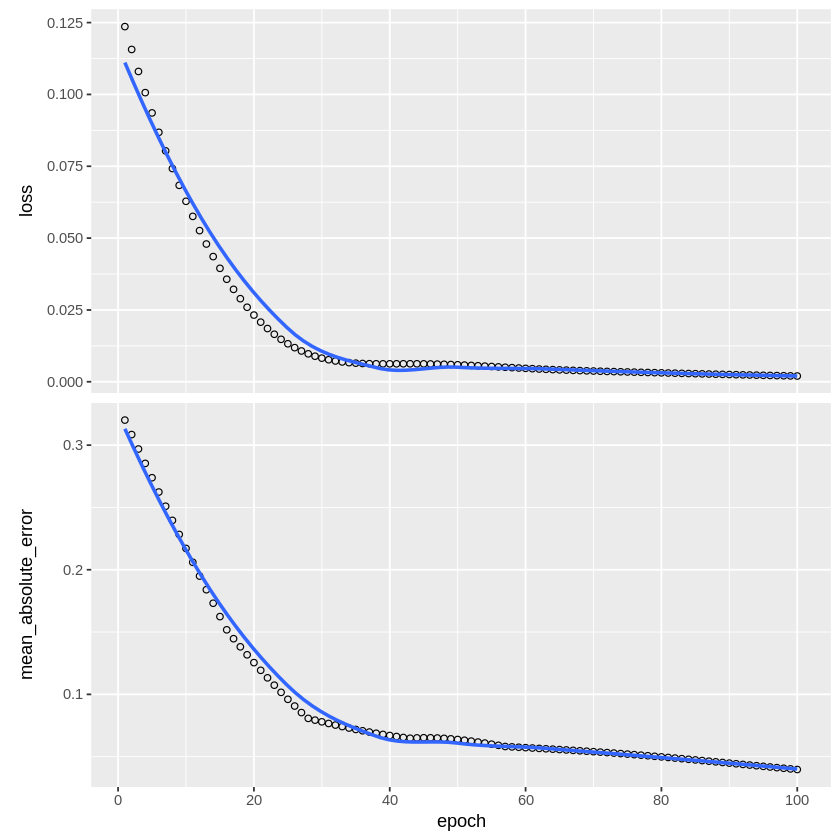

In [ ]:
# Training, Evaluation & Results

history = model %>% fit(
  x = sequential_df_scaled_final_train$X,
  y = sequential_df_scaled_final_train$y,
  epochs = 100,
  batch_size = 64
)

# Evaluate the model
results = model %>% evaluate(
  x = sequential_df_scaled_final_train$X,
  y = sequential_df_scaled_final_train$y
)

# View Model Summary
summary(model)

# Plot Training History
plot(history)

print(results)

In [ ]:
model %>% evaluate(sequential_df_scaled_final_test$X,  sequential_df_scaled_final_test$y, verbose = 2)

$loss
[1] 0.05132446

$mean_absolute_error
[1] 0.226549

In [ ]:
model %>% predict(sequential_df_scaled_final_train$X)

0.1895855
0.2760054
0.3618908
0.4469459


In [ ]:
# model$get_weights()

In [ ]:
denormalize = function(x, min_x, max_x) {
  return (x * (max_x - min_x) + min_x)
}

# Denormalization for visualization

min_sale = min(df$sequential_data, na.rm = TRUE)
max_sale = max(df$sequential_data, na.rm = TRUE)

predictions = model %>% predict(sequential_df_scaled_final_train$X)

denormalized_predictions = denormalize(predictions, min_sale, max_sale)
denormalized_actuals = denormalize(sequential_df_scaled_final_train$y, min_sale, max_sale)

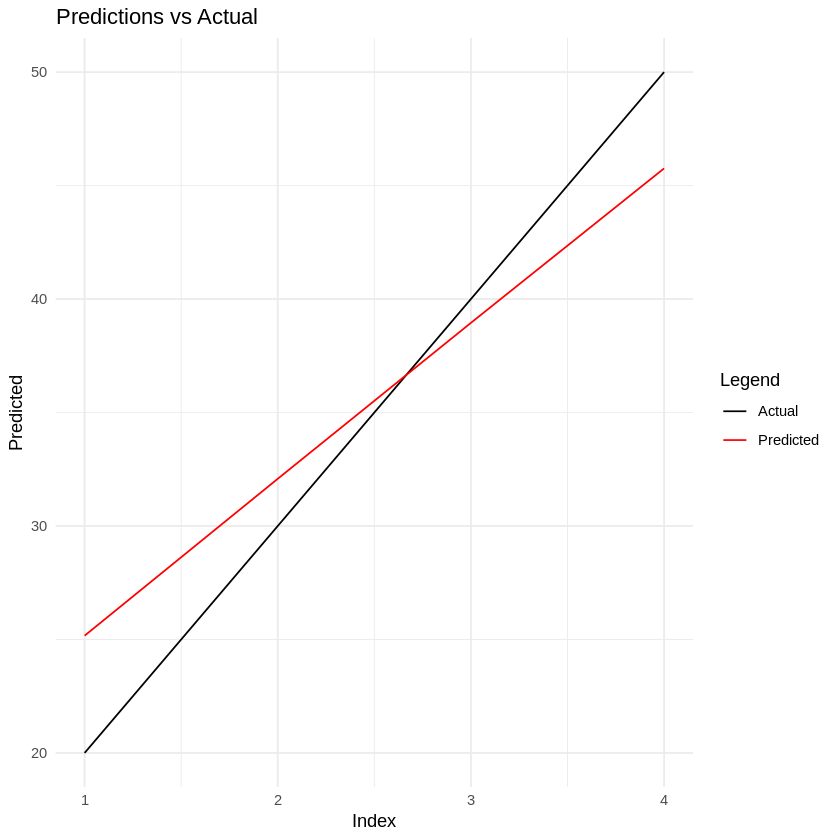

In [ ]:
library(ggplot2)

# Visualization of the results of the model

plot_data = data.frame(
  Index = 1:length(denormalized_actuals),
  Actual = denormalized_actuals,
  Predicted = denormalized_predictions
)

ggplot(plot_data, aes(x = Index)) +
  geom_line(aes(y = Actual, color = "Actual")) +
  geom_line(aes(y = Predicted, color = "Predicted")) +
  labs(title = "Predictions vs Actual",
       x = "Index",
       y = "Predicted") +
  scale_color_manual(name = "Legend", values = c("Actual" = "Black", "Predicted" = "red")) +
  theme_minimal()

In [ ]:
# Calling `save('my_model.keras')` creates a zip archive `my_model.keras`.
model |> save_model("my_rnn_tmodel.keras")

In [ ]:
summary(model)

Model: "sequential_13"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_11 (SimpleRNN)         │ (None, 50)               │         2,600 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_14 (Dense)                  │ (None, 1)                │            51 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘
 Total params: 7,955 (31.08 KB)
 Trainable params: 2,651 (10.36 KB)
 Non-trainable params: 0 (0.00 B)
 Optimizer params: 5,304 (20.72 KB)


In [ ]:
# It can be used to reconstruct the model identically.
reconstructed_model <- load_model("my_rnn_tmodel.keras")

In [ ]:
summary(reconstructed_model)

Model: "sequential_13"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_11 (SimpleRNN)         │ (None, 50)               │         2,600 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_14 (Dense)                  │ (None, 1)                │            51 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘
 Total params: 7,955 (31.08 KB)
 Trainable params: 2,651 (10.36 KB)
 Non-trainable params: 0 (0.00 B)
 Optimizer params: 5,304 (20.72 KB)


## **Exercise 1: Implementing an RNN for Time Series Forecasting**
**Objective:**

In this exercise, you will build and train a Recurrent Neural Network (RNN) for time series forecasting.

In [ ]:
# Load the dplyr library
library(dplyr)
library(lubridate)
library(purrr) # This line is added to load the purrr library.

# Load the data
data <- read.csv("https://raw.githubusercontent.com/deepshamenghani/time-series-regression-tidymodels/refs/heads/main/data/timeseries_data_single_storeproduct.csv")

df <- data %>% select(-date)
head(df)

,sales
,<int>
1,801
2,810
3,818
4,796
5,808
6,812


In [ ]:
normalize = function(x) {
  return ((x - min(x, na.rm = TRUE)) / (max(x, na.rm = TRUE) - min(x, na.rm = TRUE)))
}

# Rescale numeric columns
df_scaled = as.data.frame(lapply(df, normalize))
head(df_scaled)

,sales
,<dbl>
1,0.3085714
2,0.3600000
3,0.4057143
4,0.2800000
5,0.3485714
6,0.3714286


Model: "sequential_14"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_12 (SimpleRNN)         │ (None, 50)               │         2,600 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_15 (Dense)                  │ (None, 1)                │            51 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘
 Total params: 7,955 (31.08 KB)
 Trainable params: 2,651 (10.36 KB)
 Non-trainable params: 0 (0.00 B)
 Optimizer params: 5,304 (20.72 KB)
$loss
[1] 0.004159401

$mean_absolute_error
[1] 0.05160877



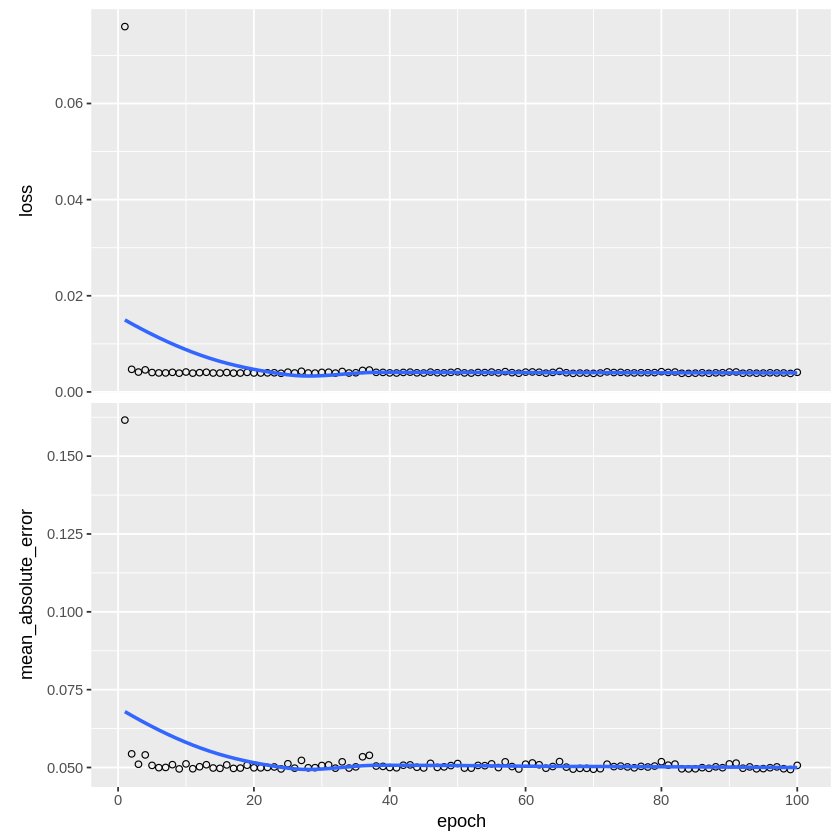

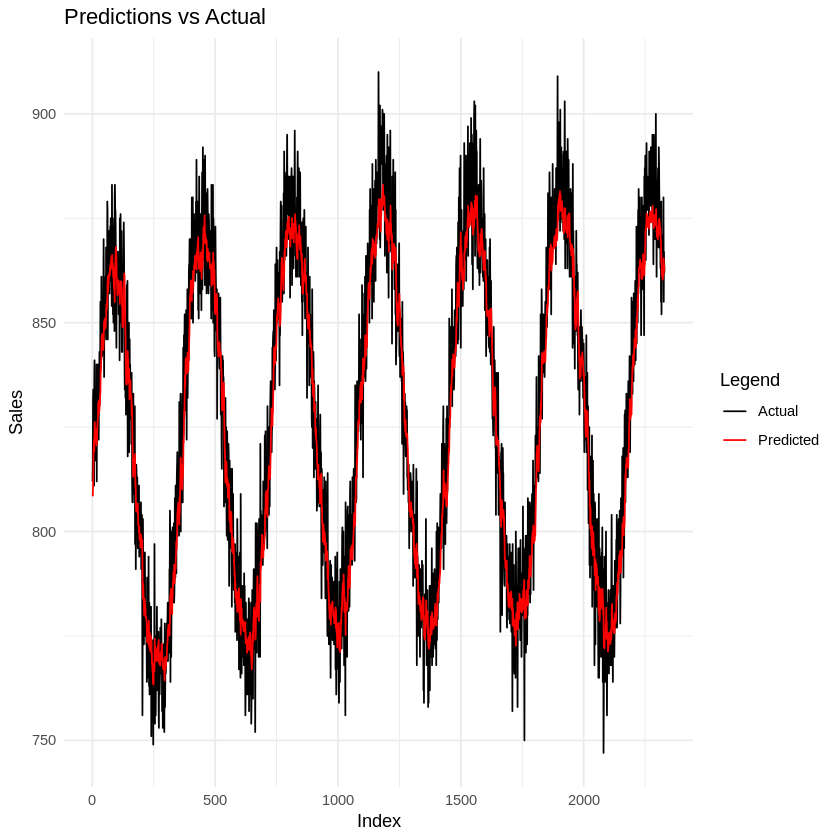

## **Exercise 2: Implementing an RNN for Time Series Forecasting**
**Objective:**

In this exercise, you will build and train a Recurrent Neural Network (RNN) for time series forecasting.

In [ ]:
install.packages("quantmod")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’




Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



######################### Warning from 'xts' package ##########################
#                                                                             #
# The dplyr lag() function breaks how base R's lag() function is supposed to  #
# work, which breaks lag(my_xts). Calls to lag(my_xts) that you type or       #
# source() into this session won't work correctly.                            #
#                                                                             #
# Use stats::lag() to make sure you're not using dplyr::lag(), or you can add #
# conflictRules('dplyr', exclude = 'lag') to your .Rprofile to stop           #
# dplyr from breaking base R's lag() function.                                #
#                                                                             #
# Code in packages is n

           TSLA.Open TSLA.High TSLA.Low TSLA.Close TSLA.Volume TSLA.Adjusted
2019-04-22  17.93333  17.97867 17.49867   17.51667   182206500      17.51667
2019-04-23  17.34333  17.70667 17.05000   17.59333   164158500      17.59333
2019-04-24  17.59000  17.68800 17.20000   17.24400   160912500      17.24400
2019-04-25  17.00000  17.26667 16.40467   16.50867   327741000      16.50867
2019-04-26  16.43333  16.44533 15.40867   15.67600   335410500      15.67600
2019-04-29  15.72400  16.26533 15.47800   16.09800   250717500      16.09800

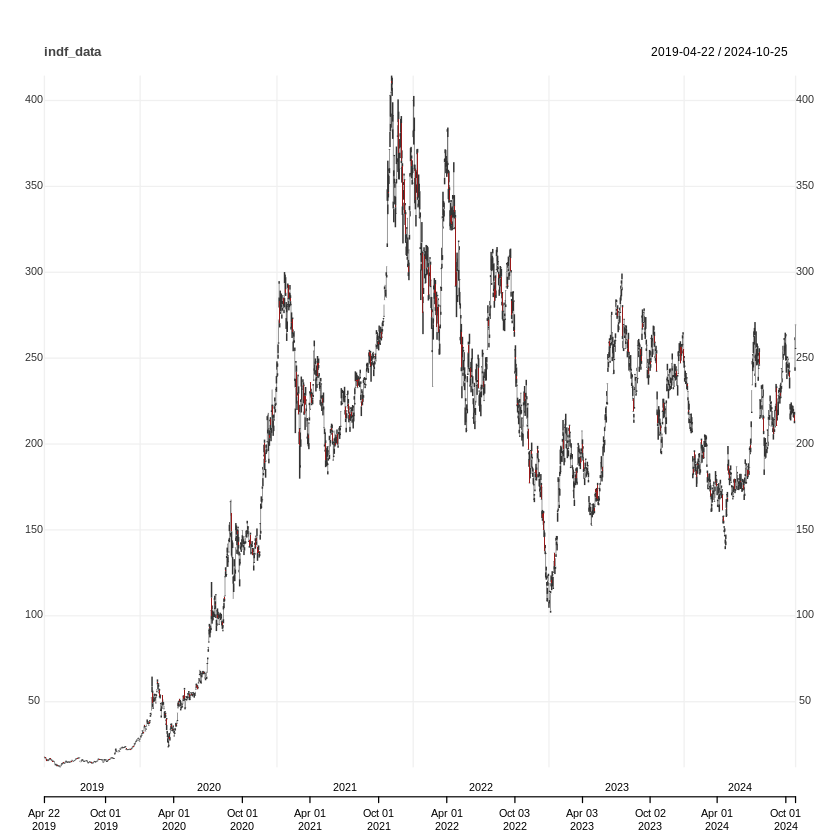

In [ ]:
library(quantmod)

# load dataset
indf_data <- getSymbols(Symbols = "TSLA", src = "yahoo", from = Sys.Date() - 2017,
                        to = Sys.Date(), auto.assign = FALSE)
indf_data <- na.omit(indf_data)
head(indf_data)
chart_Series(indf_data, col = "black")

In [ ]:
library(dplyr)
library(slider)
library(tidyr)

# Step 1: Load and Preprocess Data
indf_data <- as.data.frame(indf_data) %>%
  mutate(
    # 5-day lag
    lag_5 = lag(TSLA.Close, 5),  # Lag of 5 days to observe the influence of previous data points

    # 10-day rolling mean
    rolling_mean_10 = slide_dbl(TSLA.Close, mean, .before = 9, .complete = TRUE),  # 10-day rolling mean

    # 10-day rolling standard deviation
    rolling_sd_10 = slide_dbl(TSLA.Close, sd, .before = 9, .complete = TRUE),  # 10-day rolling standard deviation

    # Difference from 10-day rolling mean
    rolling_diff_10 = TSLA.Close - rolling_mean_10
  ) %>%
  drop_na()

  head(indf_data)

,TSLA.Open,TSLA.High,TSLA.Low,TSLA.Close,TSLA.Volume,TSLA.Adjusted,lag_5,rolling_mean_10,rolling_sd_10,rolling_diff_10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2019-05-03,16.25733,17.10733,16.23267,17.00200,355602000,17.00200,15.67600,16.54253,0.7499799,0.45946760
2019-05-06,16.66800,17.22333,16.56667,17.02267,162508500,17.02267,16.09800,16.49313,0.6927737,0.52953367
2019-05-07,17.12000,17.14733,16.34000,16.47067,151971000,16.47067,15.91267,16.38087,0.5757553,0.08980017
2019-05-08,16.46267,16.70667,16.28000,16.32267,92646000,16.32267,15.60067,16.28873,0.4895521,0.03393278
2019-05-09,16.13333,16.24533,15.79600,16.13200,100671000,16.13200,16.27333,16.25107,0.4852214,-0.11906672
2019-05-10,15.98333,16.13267,15.73467,15.96800,105124500,15.96800,17.00200,16.28027,0.4545884,-0.31226635


In [ ]:
normalize = function(x) {
  return ((x - min(x, na.rm = TRUE)) / (max(x, na.rm = TRUE) - min(x, na.rm = TRUE)))
}

# Rescale numeric columns
indf_data_scaled = as.data.frame(lapply(indf_data[, c('TSLA.Close', 'lag_5', 'rolling_mean_10', 'rolling_sd_10', 'rolling_diff_10')], normalize))

In [ ]:
head(indf_data_scaled)

,TSLA.Close,lag_5,rolling_mean_10,rolling_sd_10,rolling_diff_10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.01273913,0.009407797,0.010465006,0.015156011,0.4023475
2,0.01279105,0.010467995,0.010331635,0.013672203,0.4029580
3,0.01140425,0.010002382,0.010028537,0.010636997,0.3991262
4,0.01103243,0.009218538,0.009779794,0.008401070,0.3986394
5,0.01055342,0.010908488,0.009678101,0.008288741,0.3973062
6,0.01014140,0.012739135,0.009756936,0.007494189,0.3956227


[1] 883   5

[1] 221   5

[1] 277   5

Model: "sequential_11"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_9 (SimpleRNN)          │ (None, 50)               │         2,800 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_12 (Dense)                  │ (None, 1)                │            51 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘
 Total params: 2,851 (11.14 KB)
 Trainable params: 2,851 (11.14 KB)
 Non-trainable params: 0 (0.00 B)
Model: "sequential_11"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_9 (SimpleRNN)          │ (Non

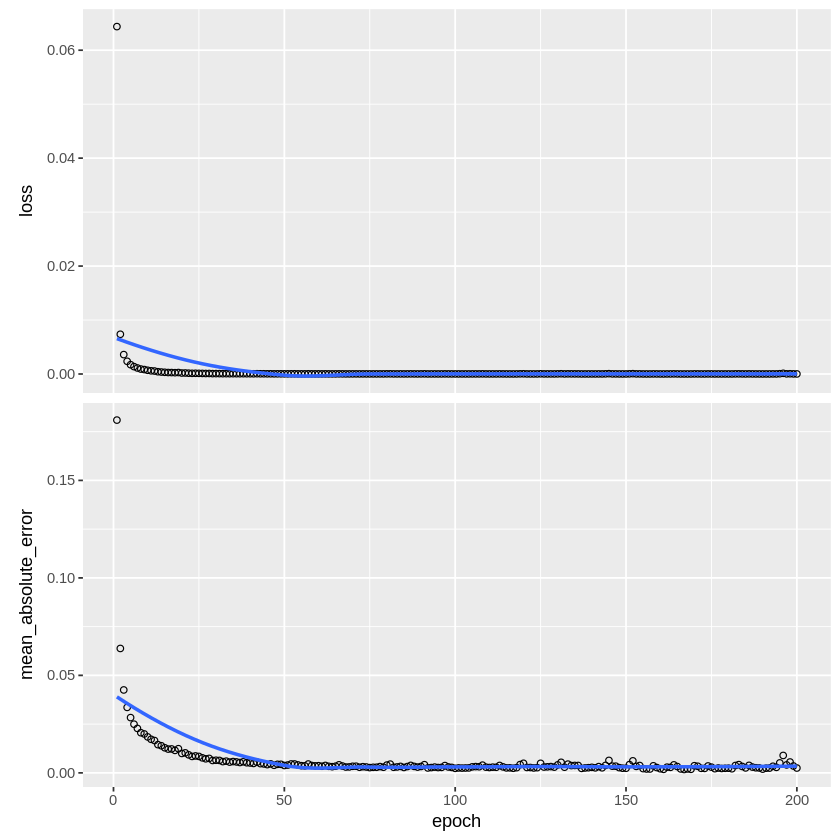

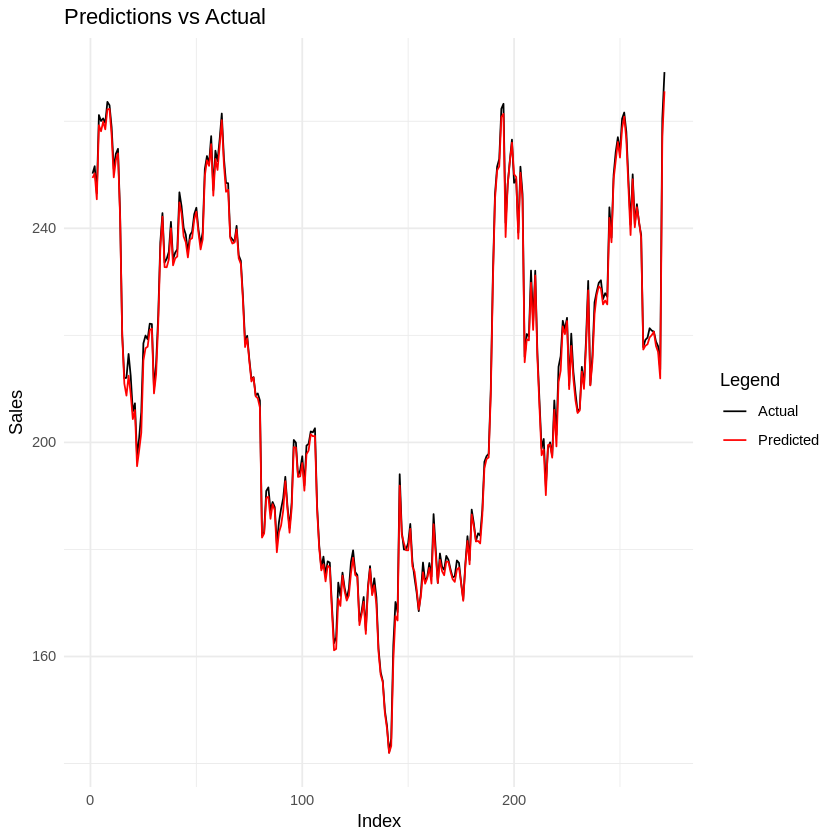